In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('unsupervised_data.csv')
dataset.head()
x_data = dataset.values[:25000,1:7]

In [ ]:
dataset.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


In [ ]:
"""
#feature scaling method 1
x_data/= x_data.max(axis=0)
print(x_data)
"""

'\n#feature scaling method 1\nx_data/= x_data.max(axis=0)\nprint(x_data)\n'

In [ ]:
"""
#feature scaling method 2
x_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))
print(x_data)
"""

'\n#feature scaling method 2\nx_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))\nprint(x_data)\n'

In [ ]:
#feature scaling method 3 (Z-Score)
x_data=(x_data - np.mean(x_data,axis = 0))/np.std(x_data,axis = 0)
print(x_data)

[[-0.35705165 -0.37530785  0.5494281  -1.14793713 -0.2448101  -0.39682965]
 [-0.54964392  1.35082961  1.01921459  0.07658931 -0.84934494 -1.2354753 ]
 [-1.51545079  1.20264509  0.4331185   0.56354782 -0.88103336  1.55350891]
 ...
 [ 0.78955767 -1.13099702 -1.40431791  1.67699441  2.01435541  0.92208809]
 [ 0.16484189  0.79855501 -0.84249964  0.09976312  0.98729562 -1.22609429]
 [ 0.93181614 -0.88504869 -1.31826386  1.64698312  1.99300534  1.03482196]]


In [ ]:
def find_closest_centroids(x_data, centroids):
    K = centroids.shape[0]
    idx = np.zeros(x_data.shape[0], dtype=int)
    for i in range (x_data.shape[0]):
        min_d = 10000
        for j in range (K):
            d = np.linalg.norm(x_data[i]-centroids[j])
            if (d < min_d):
                min_d = d
                idx[i] = j
    return idx

In [ ]:
def compute_centroids(x_data, idx, K):
    m, n = x_data.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        pt = x_data[np.where(idx == i)]
        if len(pt) > 0:
            centroids[i] = np.mean(pt, axis=0)
    return centroids

In [ ]:
def kMeans_init_centroids(x_data, K):
    return x_data[np.random.permutation(x_data.shape[0])[:K]]

In [ ]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    col = ListedColormap(["pink", "orange", "cyan"])(idx)
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=col, linewidth=0.1, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    for j in range(centroids.shape[0]):
        plt.plot([centroids[j, :][0], previous_centroids[j, :][0]], [centroids[j, :][1], previous_centroids[j, :][1]], linewidth=1)

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m, dtype=int)
    if plot_progress:
        plt.figure(figsize=(8, 6))
    for i in range(max_iters):
        print(f"Iteration: {i}/{max_iters - 1}")
        idx = find_closest_centroids(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
        previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    if plot_progress:
        plt.show()
    return centroids, idx


In [ ]:
def calculate_inertia(X, idx, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[np.where(idx == i)]
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia


In [ ]:
def elbow_method(X, max_k=10, max_iters=10):
    inertias = []
    for K in range(1, max_k + 1):
        initial_centroids = kMeans_init_centroids(X, K)
        centroids, idx = run_kMeans(X, initial_centroids, max_iters=max_iters, plot_progress=False)
        inertia = calculate_inertia(X, idx, centroids)
        inertias.append(inertia)
        print(f"Unique cluster assignments: {np.unique(idx, return_counts=True)}")
    return inertias

Iteration: 0/9
Iteration: 1/9
Iteration: 2/9
Iteration: 3/9
Iteration: 4/9
Iteration: 5/9
Iteration: 6/9
Iteration: 7/9
Iteration: 8/9
Iteration: 9/9
Unique cluster assignments: (array([0]), array([25000]))
Iteration: 0/9
Iteration: 1/9
Iteration: 2/9
Iteration: 3/9
Iteration: 4/9
Iteration: 5/9
Iteration: 6/9
Iteration: 7/9
Iteration: 8/9
Iteration: 9/9
Unique cluster assignments: (array([0, 1]), array([ 7183, 17817]))
Iteration: 0/9
Iteration: 1/9
Iteration: 2/9
Iteration: 3/9
Iteration: 4/9
Iteration: 5/9
Iteration: 6/9
Iteration: 7/9
Iteration: 8/9
Iteration: 9/9
Unique cluster assignments: (array([0, 1, 2]), array([ 7178,  3563, 14259]))
Iteration: 0/9
Iteration: 1/9
Iteration: 2/9
Iteration: 3/9
Iteration: 4/9
Iteration: 5/9
Iteration: 6/9
Iteration: 7/9
Iteration: 8/9
Iteration: 9/9
Unique cluster assignments: (array([0, 1, 2, 3]), array([ 3513,  3609, 10690,  7188]))
Iteration: 0/9
Iteration: 1/9
Iteration: 2/9
Iteration: 3/9
Iteration: 4/9
Iteration: 5/9
Iteration: 6/9
Iterati

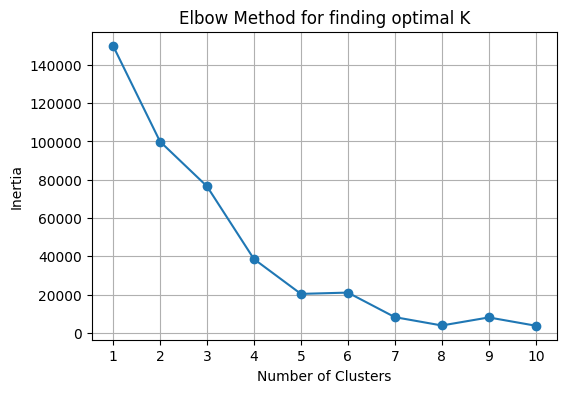

In [ ]:
max_k = 10
max_iters = 10
inertias = elbow_method(x_data, max_k=max_k, max_iters=max_iters)

plt.figure(figsize=(6,4))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for finding optimal K')
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()

0
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
1
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
2
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
3
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
4
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
5
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
6
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
7
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
8
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
9
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
10
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
11
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 4/4
12
Iteration: 0/4
Iteration: 1/4
Iteration: 2/4
Iteration: 3/4
Iteration: 

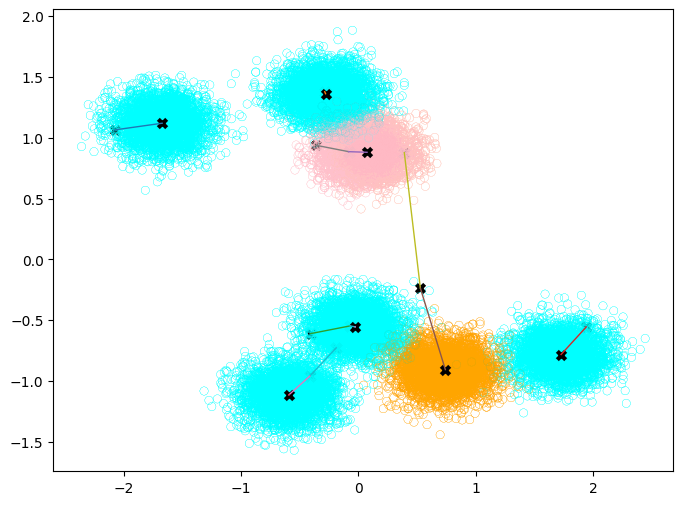

Cluster 0: 1594 points
Cluster 1: 3578 points
Cluster 2: 3569 points
Cluster 3: 7188 points
Cluster 4: 3609 points
Cluster 5: 1919 points
Cluster 6: 3543 points


In [ ]:
K = 7
max_iters = 5
best_inertia = float('inf')
best_centroids = None
best_idx = None
for i in range(25):
    print(i)
    initial_centroids = kMeans_init_centroids(x_data, K)
    centroids, idx = run_kMeans(x_data, initial_centroids, max_iters, plot_progress=False)
    inertia = calculate_inertia(x_data, idx, centroids)
    if inertia < best_inertia:
        best_inertia = inertia
        best_initial_centroids = initial_centroids
run_kMeans(x_data, best_initial_centroids, max_iters, plot_progress=True)

for i in range(K):
    print(f"Cluster {i}: {np.sum(idx == i)} points")